In [24]:
import torch #torch import
import matplotlib.pyplot as plt
import numpy as np

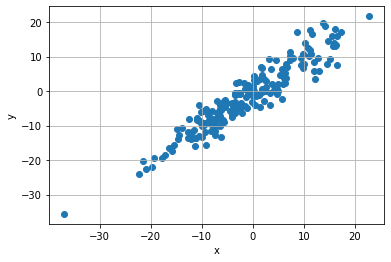

In [25]:
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

In [26]:
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__()
    self.linear1 = nn.Linear(1, 4)
    self.linear2 = nn.Linear(4, 8)
    self.linear3 = nn.Linear(8, 4)
    self.linear4 = nn.Linear(4, 2)
    self.linear5 = nn.Linear(2, 1)

  def forward(self, x):
    x = self.linear1(x)
    x = self.linear2(x)
    x = self.linear3(x)
    x = self.linear4(x)
    x = self.linear5(x)

    return x

linear_net = LinearRegressionModel()
print(linear_net)
print(list(linear_net.parameters()))

LinearRegressionModel(
  (linear1): Linear(in_features=1, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=8, bias=True)
  (linear3): Linear(in_features=8, out_features=4, bias=True)
  (linear4): Linear(in_features=4, out_features=2, bias=True)
  (linear5): Linear(in_features=2, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.8735],
        [ 0.6908],
        [-0.8134],
        [ 0.0358]], requires_grad=True), Parameter containing:
tensor([ 0.9358,  0.5762,  0.1334, -0.0397], requires_grad=True), Parameter containing:
tensor([[-3.4970e-01,  2.5335e-01, -2.7262e-01, -7.8783e-02],
        [ 2.9793e-01, -3.0515e-01,  4.9304e-01, -1.3867e-01],
        [-1.2239e-01, -3.5557e-01, -1.9722e-01,  4.7912e-01],
        [ 4.0645e-01, -2.6007e-01,  6.0310e-02,  2.8035e-02],
        [ 2.8517e-02, -2.0934e-01,  9.1255e-05, -5.4817e-02],
        [ 4.5115e-01, -8.9153e-02,  3.4026e-01, -2.4744e-01],
        [ 2.9071e-02, -1.8907e-01, -1.9345e-01, -2.9965e-01],


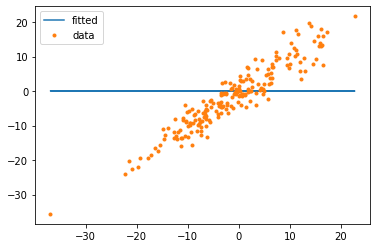

In [38]:
y_pred = linear_net(X)
plt.plot(X, y_pred.detach().numpy(), label = 'fitted')
plt.plot(X, y, '.', label = 'data')
plt.legend()

In [39]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(linear_net.parameters(), lr = 0.001)

In [40]:
epochs = 100
losses = []

for i, epoch in enumerate(range(epochs)):
  optimizer.zero_grad()

  y_pred = linear_net(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward()

  optimizer.step()

  print('Epoch: {}, Loss: {}'.format(epoch+1, loss.item()))

Epoch: 1, Loss: 91.76351928710938
Epoch: 2, Loss: 86.41468811035156
Epoch: 3, Loss: 80.73246765136719
Epoch: 4, Loss: 73.4831771850586
Epoch: 5, Loss: 63.489139556884766
Epoch: 6, Loss: 49.79696273803711
Epoch: 7, Loss: 32.94538879394531
Epoch: 8, Loss: 17.53099822998047
Epoch: 9, Loss: 10.425044059753418
Epoch: 10, Loss: 9.638860702514648
Epoch: 11, Loss: 9.633772850036621
Epoch: 12, Loss: 9.631597518920898
Epoch: 13, Loss: 9.629456520080566
Epoch: 14, Loss: 9.627346992492676
Epoch: 15, Loss: 9.625265121459961
Epoch: 16, Loss: 9.623215675354004
Epoch: 17, Loss: 9.621192932128906
Epoch: 18, Loss: 9.619200706481934
Epoch: 19, Loss: 9.617234230041504
Epoch: 20, Loss: 9.615297317504883
Epoch: 21, Loss: 9.613387107849121
Epoch: 22, Loss: 9.611504554748535
Epoch: 23, Loss: 9.609646797180176
Epoch: 24, Loss: 9.60781478881836
Epoch: 25, Loss: 9.606010437011719
Epoch: 26, Loss: 9.604229927062988
Epoch: 27, Loss: 9.602474212646484
Epoch: 28, Loss: 9.600743293762207
Epoch: 29, Loss: 9.5990371704

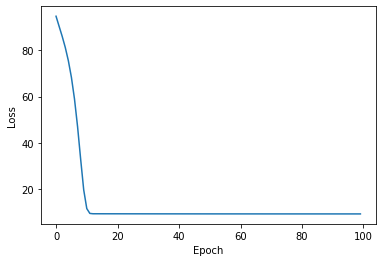

In [36]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

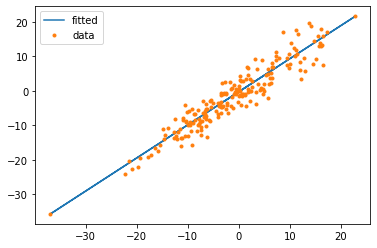

In [41]:
y_pred = linear_net(X)
plt.plot(X, y_pred.detach().numpy(), label = 'fitted')
plt.plot(X, y, '.', label = 'data')
plt.legend()